In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
# remove the next two imports for use outside a Jupyter notebook
from ipywidgets import widgets
from IPython.display import display


def colored_points():
    """
    Plots points coloring them depending on each side of a straigh line
    they are located. The first two clicks define the line. Color of 
    subsequent points is determined using a determinant computation. 
    The value of the determinant for each newly selected point is displayed 
    in the upper left corner.
    """
    # plot limits
    xlim = 200
    ylim = 100
    lim = xlim + ylim
    line_color = "steelblue"
    fill_line = "w"
    fill_up = "tomato"
    fill_down = "lawngreen"
    # dictionary with properties of markers 
    marker_style = dict(marker='o', 
                        mec =line_color,  
                        mfc= fill_line , 
                        mew = 2, 
                        ms=8)
    
    style.use("seaborn")
    fig = plt.figure(figsize = (8, 4))
    ax = plt.subplot(111)
    ax.set_xlim(0, xlim)
    ax.set_ylim(0, ylim) 

    # absolute positioning of text, so it is in the same spot after zooming in/out
    init_text = dict(x = 0.03, 
                  y = 0.9, 
                  s=r"", 
                  bbox=dict(facecolor='w', edgecolor='k', pad=5),
                  transform=ax.transAxes,
                  zorder = 30)
    
    txt = ax.text(**init_text)

    #point counter
    count = 0

    A = np.zeros(2)
    B = np.zeros(2)
    AB = np.zeros(2)
    
    click_x, click_y = 0, 0
    
    def onclick(event):
        #Point are plotted on release. Here we just record click 
        #coordinates to detect dragging. 
        nonlocal click_x, click_y
        
        click_x, click_y = event.x, event.y
        
        
    def onrelease(event):

        nonlocal ax, count, A, B, AB, txt, click_x, click_y
        
        # if click coordinates are some distance from release coordinates
        # then mouse is being dragged - no plotting in such case. 
        if abs(click_x - event.x) + abs(click_y - event.y) > 10:
            return
      
        X = np.array(ax.transData.inverted().transform((event.x,event.y)))
        text = plt.text
        if count == 0:
            # plot point A
            A = X
            plt.plot(*A, **marker_style, zorder = 10)
            count += 1
        elif count == 1:
            B = X
            AB = B - A
            # check that points A and B not equal
            if not np.array_equal(AB, np.zeros(2)):
                # plot point B and the line through A and B
                plt.plot(*B, 'o', **marker_style, zorder = 10)
                Ainf = A - 2*lim*AB
                Binf = A + 2*lim*AB
                plt.plot(*zip(Ainf, Binf), "-", color = line_color, lw = 3, zorder = 1)
                count += 1
        else:
            #plot subsequent points
            AX = X - A
            d = round(np.linalg.det(np.vstack((AB, AX))), 12)
            if d ==0:
                marker_style["mfc"] = fill_line
            elif d > 0:
                marker_style["mfc"] = fill_up
            else:
                marker_style["mfc"] = fill_down
            plt.plot(*X, **marker_style, zorder = 10)
            if abs(d) > 1:
                dd = int(d)
            elif abs(d) > 0.001:
                dd = format(d, ".4f")
            else:
                dd = format(d, ".12f")
            txt.set_text(r"$\det\ M_X = {}$".format(dd))
            plt.draw()

    cid_click = fig.canvas.mpl_connect('button_press_event', onclick)
    cid_release = fig.canvas.mpl_connect('button_release_event', onrelease)
    plt.show()

    
    # The rest of the code defines a Jupyer notebook widget with a button resetting the plot.
    # It will not work outside a notebook.
    def reset_values(b):
        """Reset the plots to inital values."""
        nonlocal ax, A, B, AB, count, txt, marker_style
        count = 0
        A = np.zeros(2)
        B = np.zeros(2)
        AB = np.zeros(2)
        marker_style["mfc"] = fill_line
        ax.clear()
        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)
        txt = ax.text(**init_text)
    
    
    reset_button = widgets.Button(description = "Reset")
    reset_button.on_click(reset_values)
    display(reset_button)

<IPython.core.display.Javascript object>


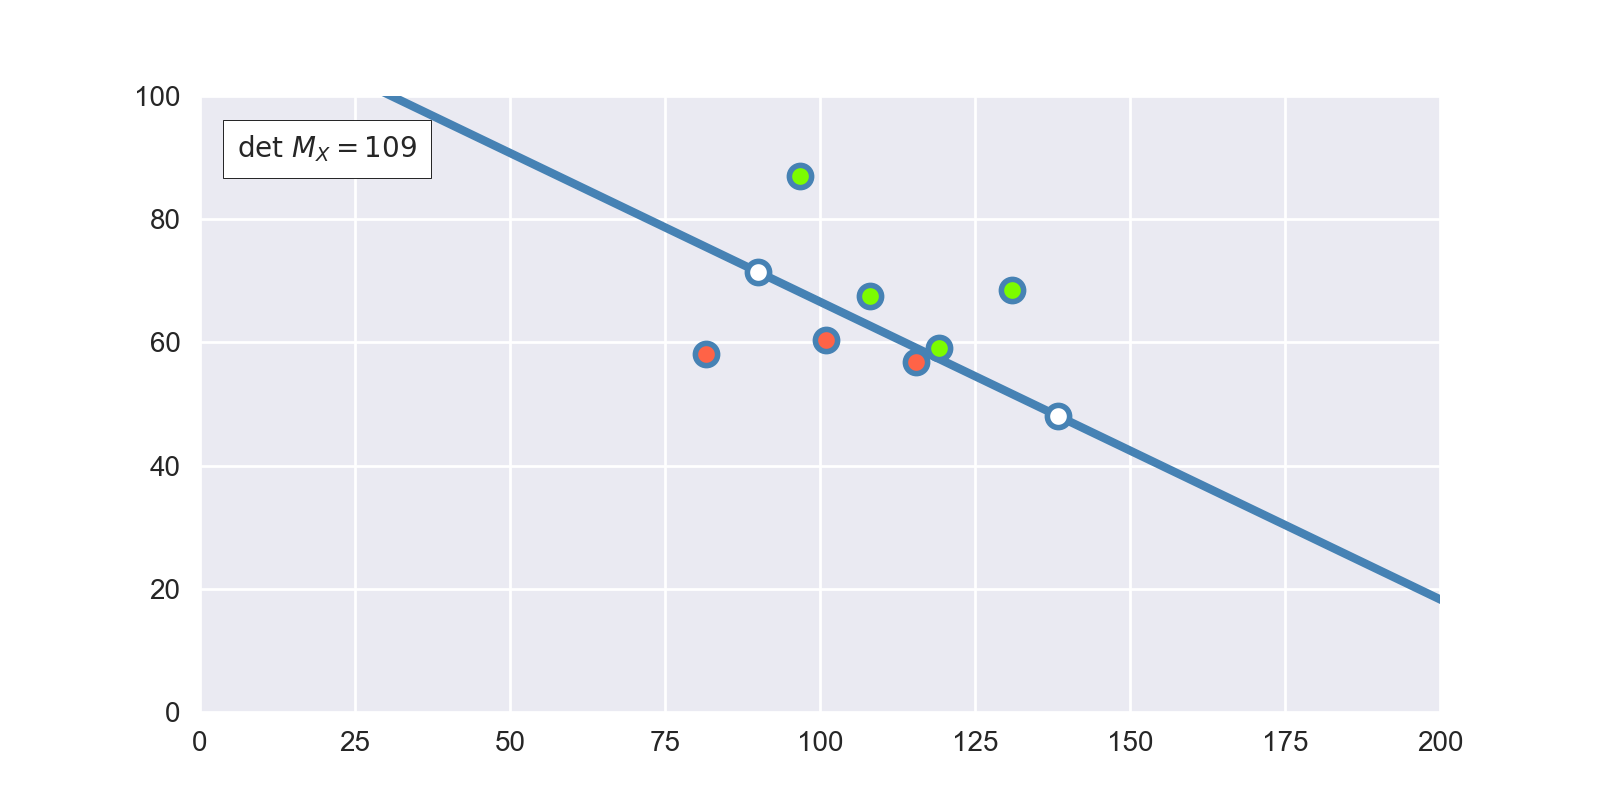

Button(description='Reset', style=ButtonStyle())

In [39]:
colored_points()

In [3]:
def f():
    x = 2
    def g(n=None):
        nonlocal x
        if n is not None:
            x=n
        print(x)
    
    def h(n=None):
        nonlocal x
        if n is not None:
            x =n
        print(x)
    return g, h

In [4]:
g, h = f()

In [5]:
g(2)

2


In [6]:
h()

2


In [8]:
dir(h)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [11]:
dir(h.__closure__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [26]:
zh = h.__closure__[0]
zg = g.__closure__[0]

In [27]:
zh, zg

(<cell at 0x121a3a7d0: int object at 0x1102ce4b0>,
 <cell at 0x121a3a7d0: int object at 0x1102ce4b0>)

In [24]:
dir(zz)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'cell_contents']

In [25]:
zz.cell_contents

2